In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
violin_audio, sr = librosa.load('audios/14- Extracting the Discrete Fourier Transform_audio_violin_c.wav')
sax_audio, _ = librosa.load('audios/14- Extracting the Discrete Fourier Transform_audio_sax.wav')
piano_audio, _ =librosa.load('audios/14- Extracting the Discrete Fourier Transform_audio_piano_c.wav')
noise_audio, _ = librosa.load('audios/noise.wav')
scale_audio, _ = librosa.load('audios/16 - Extracting Spectrograms from Audio with Python_audio_scale.wav')

(59772,)


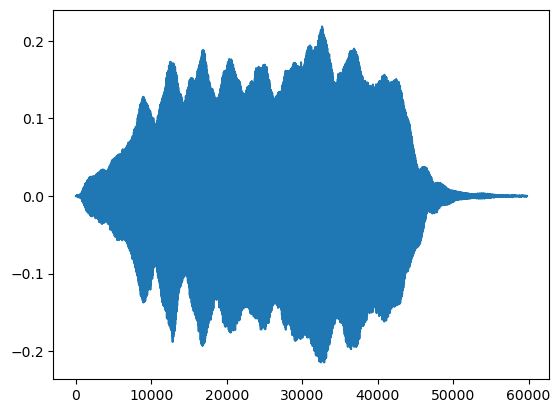

In [3]:
plt.plot(violin_audio)
print(violin_audio.shape)

In [4]:
def plot_fft_mag(signal, title, sr, f_ratio=1, return_values=False):
    signal_ft = np.fft.fft(signal)
    fft_mag = np.abs(signal_ft)
    plt.figure(figsize=(18,5))
    freq = np.linspace(0,sr,len(fft_mag))
    num_freq = int(len(fft_mag)*f_ratio)
    if return_values:
        return freq[:num_freq], fft_mag[:num_freq]
    else:
        plt.plot(freq[:num_freq], fft_mag[:num_freq])
        plt.xlabel("Frequency [hz]")
        plt.title(title)

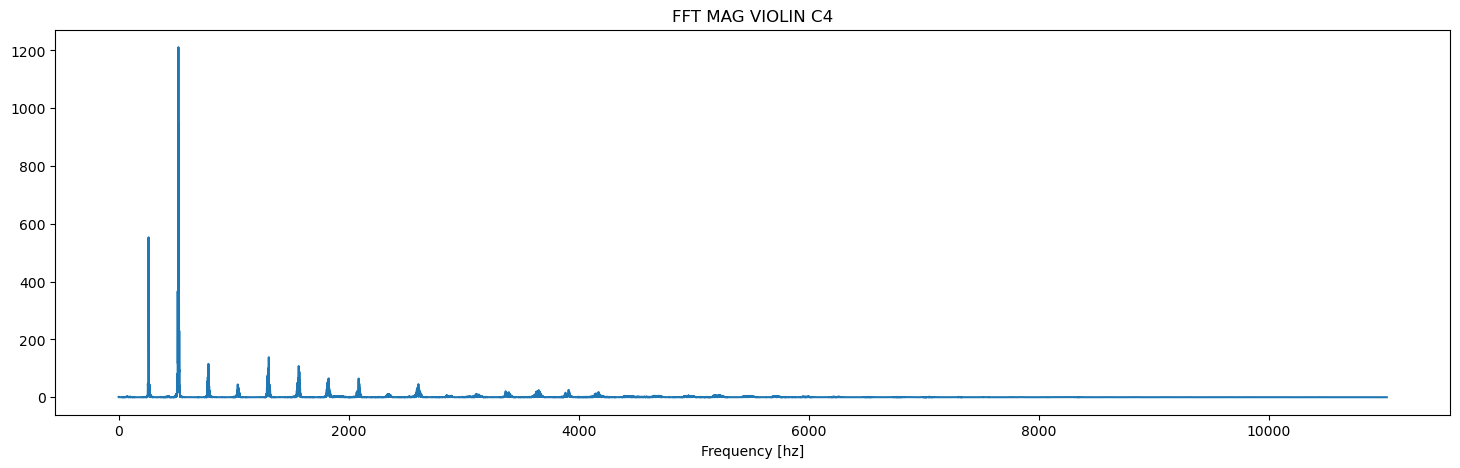

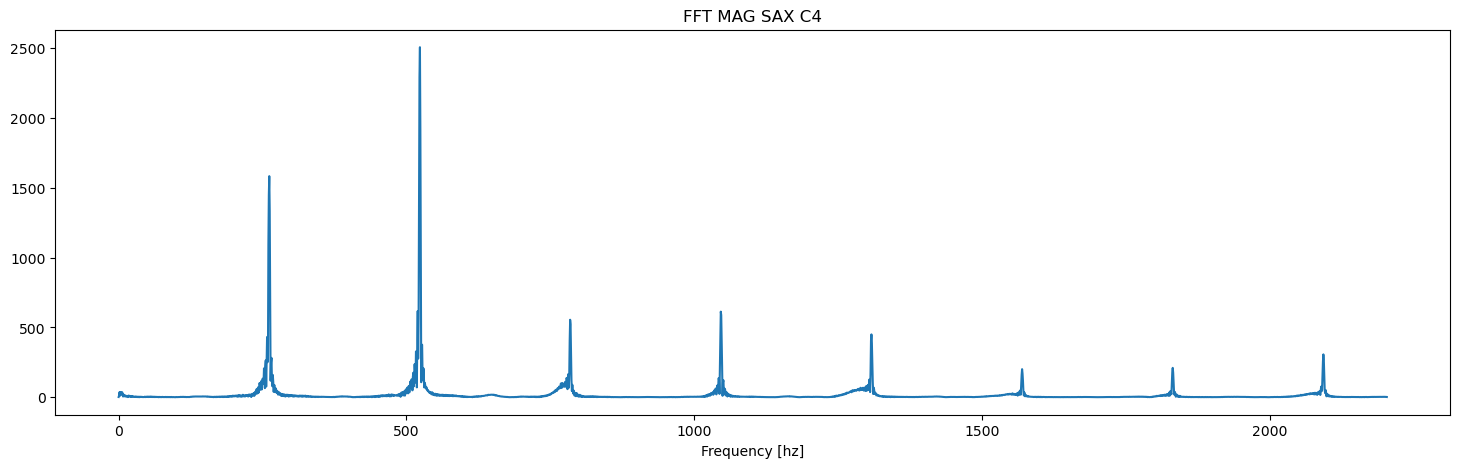

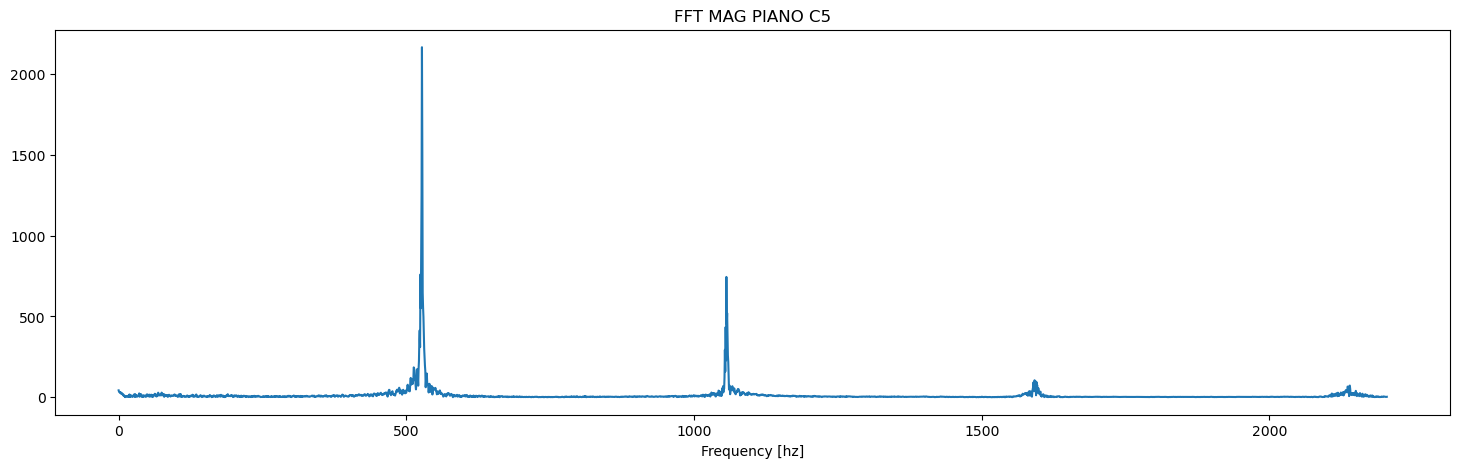

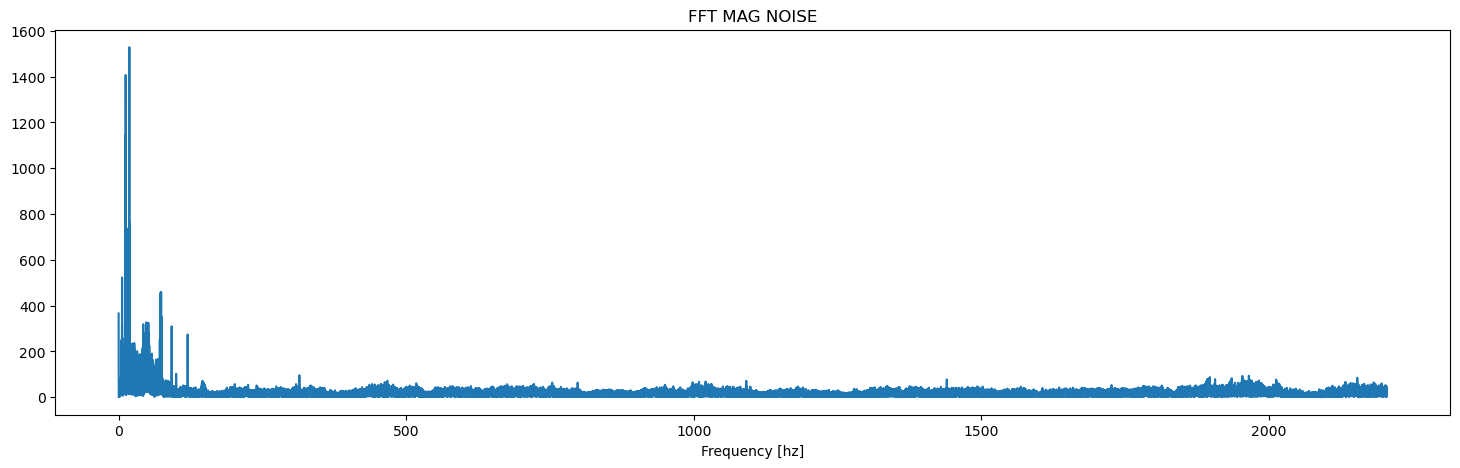

In [5]:
plot_fft_mag(violin_audio, "FFT MAG VIOLIN C4", sr, 0.5)
plot_fft_mag(sax_audio, "FFT MAG SAX C4", sr, 0.1)
plot_fft_mag(piano_audio, "FFT MAG PIANO C5", sr, 0.1)
plot_fft_mag(noise_audio, "FFT MAG NOISE", sr, 0.1)

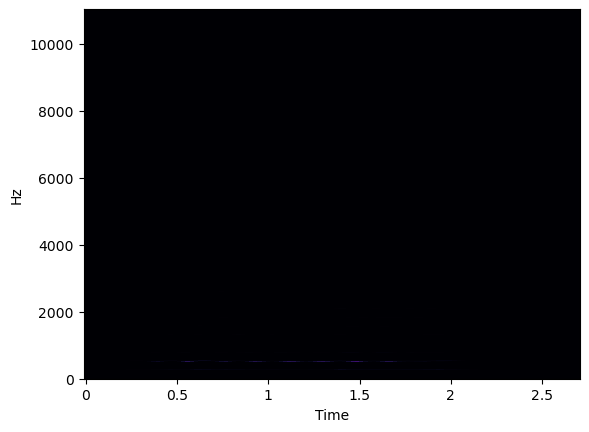

In [6]:
FRAME_SIZE = 2048
HOP_SIZE = 512
NOISE_STFT = librosa.stft(violin_audio, hop_length=HOP_SIZE, n_fft=FRAME_SIZE)
NOISE_STFT_MAG = np.abs(NOISE_STFT)**2
librosa.display.specshow(NOISE_STFT_MAG, sr=sr, x_axis='time', y_axis='linear')

Text(0.5, 1.0, 'STFT')

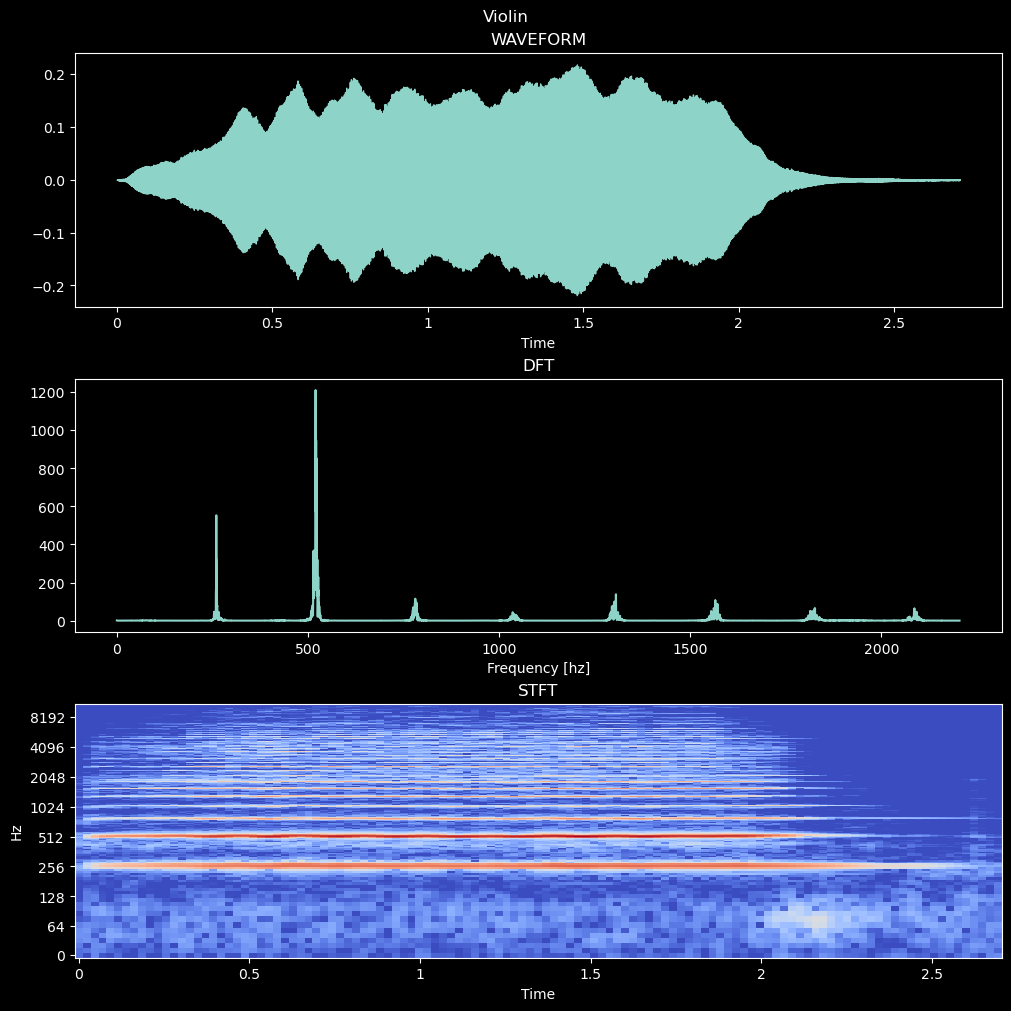

<Figure size 1800x500 with 0 Axes>

In [7]:
NOISE_STFT_MAG = librosa.power_to_db(np.abs(NOISE_STFT)**2)
plt.style.use('dark_background')
_, ax = plt.subplots(3,1,figsize=(10,10), layout="constrained")
plt.suptitle('Violin')
librosa.display.waveshow(violin_audio, sr=sr, ax=ax[0])
ax[0].set_title('WAVEFORM')
freq, fft_mag = plot_fft_mag(violin_audio, "FFT MAG VIOLIN C4", sr, 0.1, return_values=True)
ax[1].plot(freq, fft_mag)
ax[1].set_xlabel("Frequency [hz]")
ax[1].set_title('DFT')
librosa.display.specshow(NOISE_STFT_MAG, sr=sr, x_axis='time', y_axis='log', ax=ax[2])
ax[2].set_title('STFT')

Text(0.5, 1.0, 'STFT MAG')

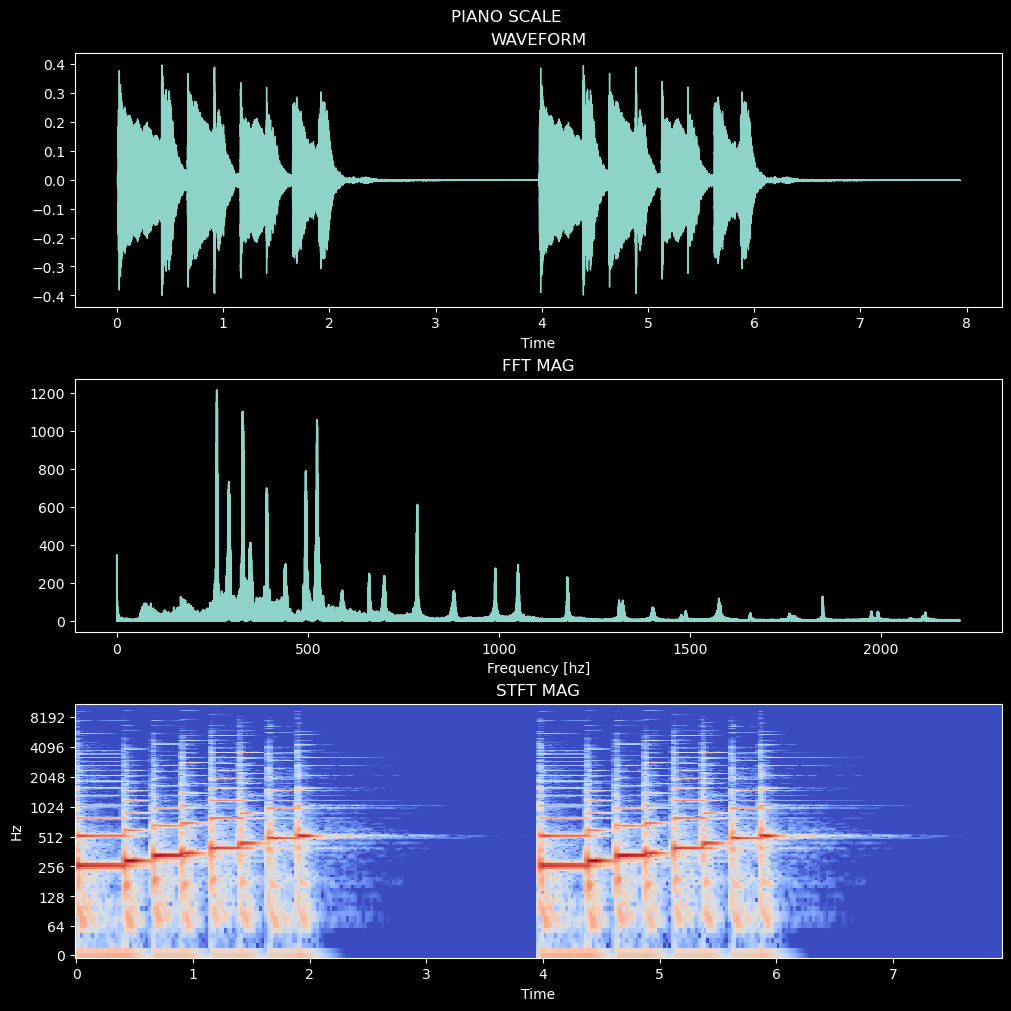

<Figure size 1800x500 with 0 Axes>

In [8]:
SCALE_STFT = librosa.stft(scale_audio, hop_length=HOP_SIZE, n_fft=FRAME_SIZE)
SCALE_STFT_MAG = librosa.power_to_db(np.abs(SCALE_STFT)**2)
plt.style.use('dark_background')
_, ax = plt.subplots(3,1,figsize=(10,10), layout="constrained")
plt.suptitle('PIANO SCALE')
librosa.display.waveshow(scale_audio, sr=sr, ax=ax[0])
ax[0].set_title('WAVEFORM')
freq, fft_mag = plot_fft_mag(scale_audio, "FFT MAG SCALE C4", sr, 0.1, return_values=True)
ax[1].plot(freq, fft_mag)
ax[1].set_xlabel("Frequency [hz]")
ax[1].set_title('FFT MAG')
librosa.display.specshow(SCALE_STFT_MAG, sr=sr, x_axis='time', y_axis='log', ax=ax[2])
ax[2].set_title('STFT MAG')

Text(0.5, 1.0, 'MEL SPEC')

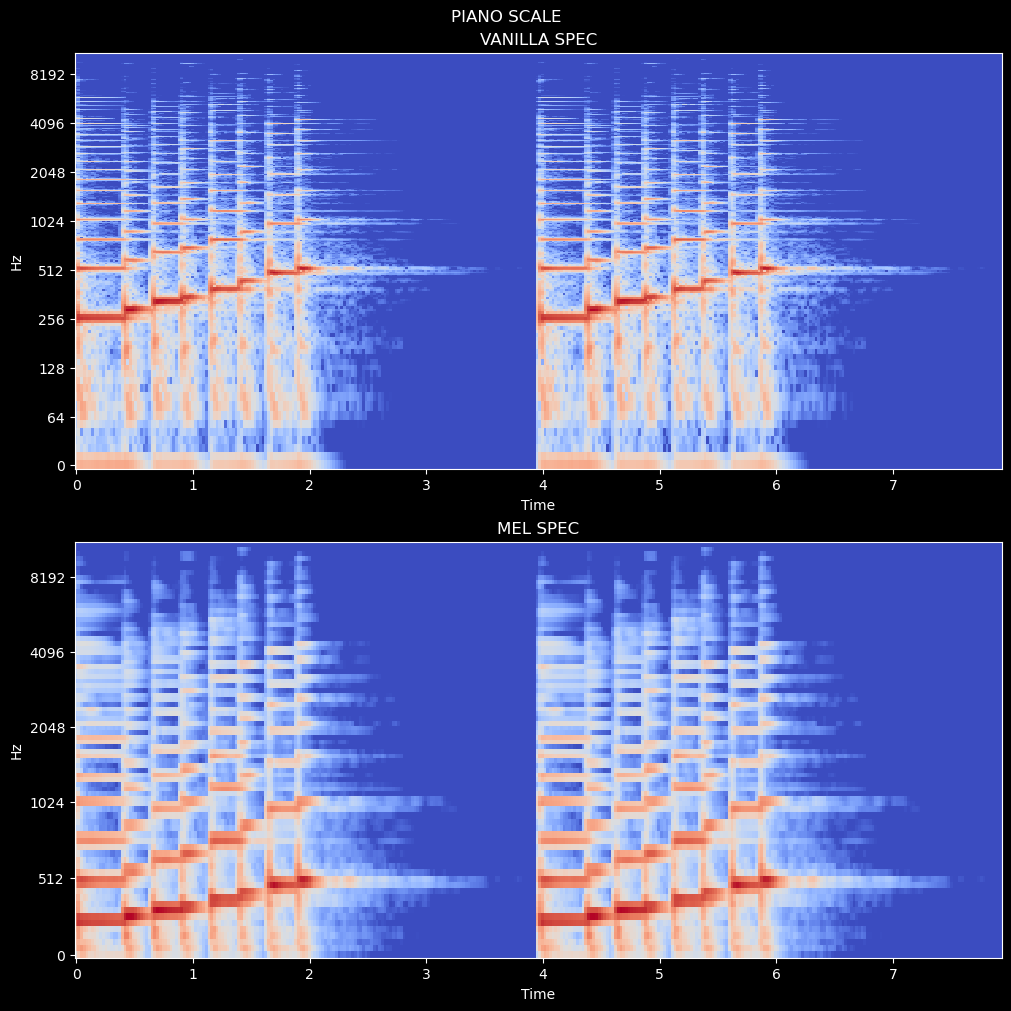

In [9]:
_, ax = plt.subplots(2,1,figsize=(10,10), layout="constrained")
plt.suptitle('PIANO SCALE')
plt.style.use('dark_background')
librosa.display.specshow(SCALE_STFT_MAG, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title('VANILLA SPEC')
N_MELS = 80
MEL_SPEC_SCALE = librosa.feature.melspectrogram(y=scale_audio, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=N_MELS)
DB_MEL_SPEC_SCALE = librosa.power_to_db(MEL_SPEC_SCALE)
librosa.display.specshow(DB_MEL_SPEC_SCALE, sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set_title('MEL SPEC')

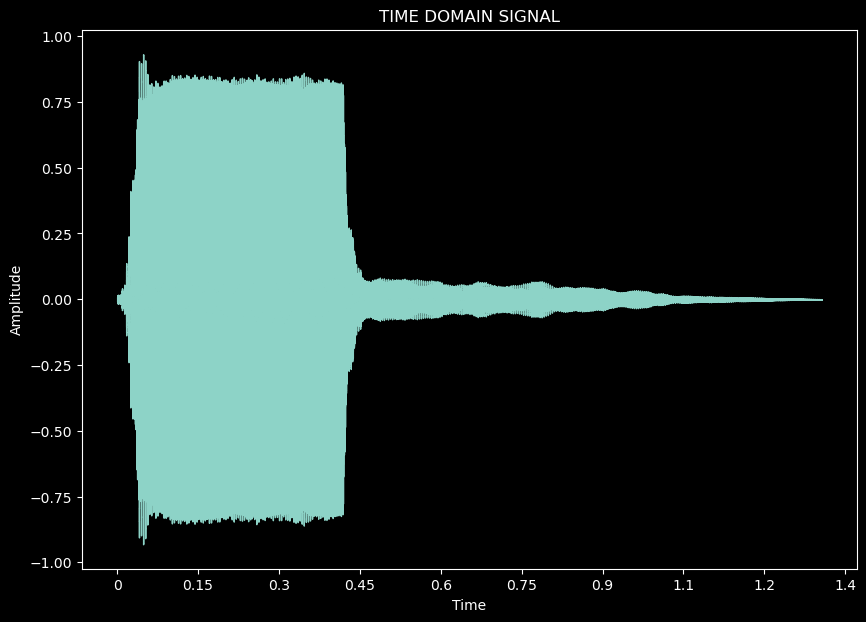

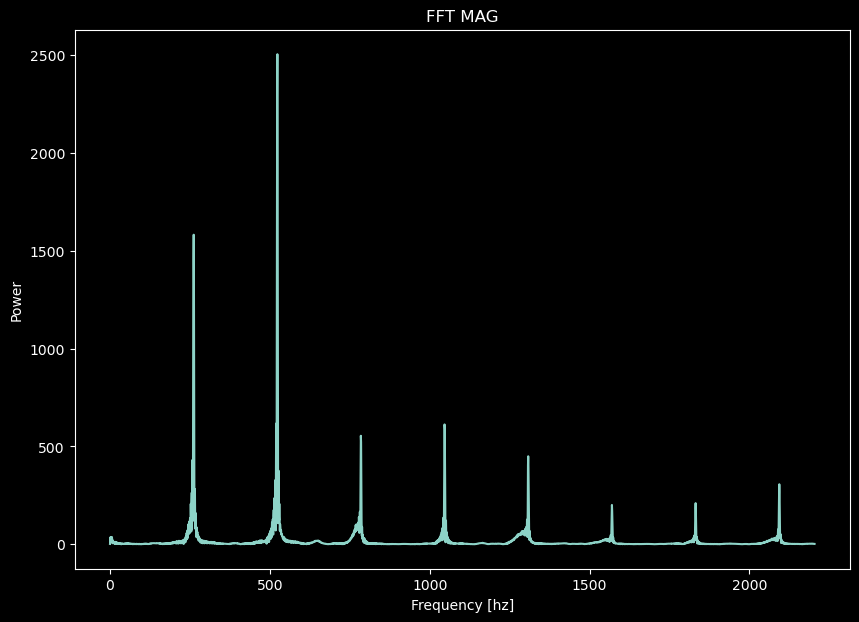

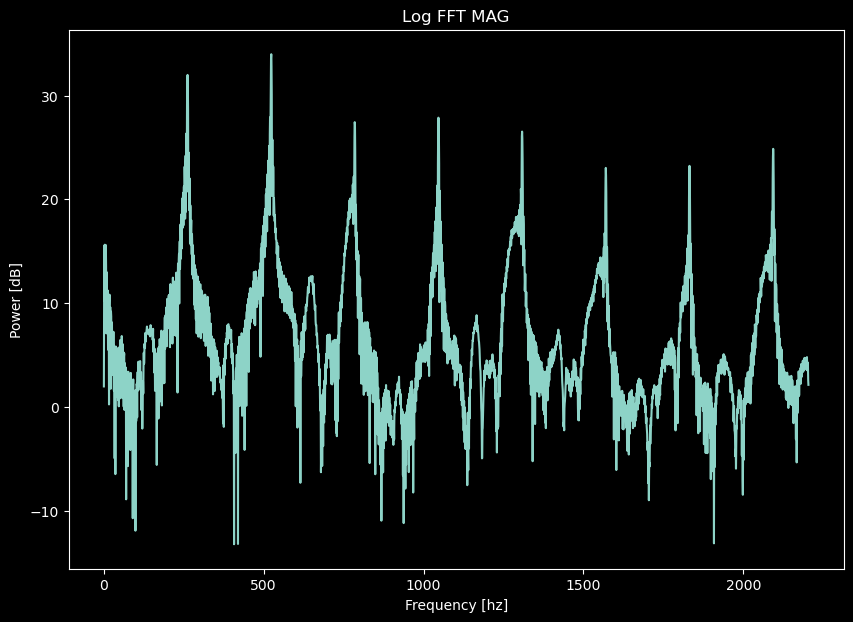

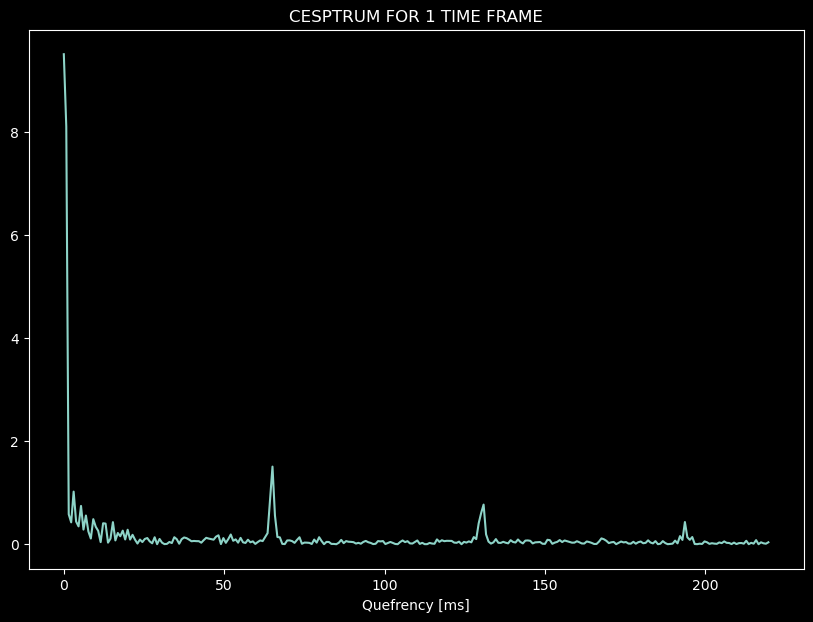

In [10]:
audio_SAX, sr = librosa.load('audios/14- Extracting the Discrete Fourier Transform_audio_sax.wav')
plt.figure(figsize=(10,7))
librosa.display.waveshow(audio_SAX, sr=sr)
plt.ylabel('Amplitude')
plt.title("TIME DOMAIN SIGNAL")


F_RATIO = 0.1
freq = np.linspace(0,sr,len(audio_SAX))
num_freq = int(len(audio_SAX)*F_RATIO)

AUDIO_SAX_FFT = np.fft.fft(audio_SAX)
AUDIO_SAX_MAG = np.abs(AUDIO_SAX_FFT)
plt.figure(figsize=(10,7))
plt.plot(freq[:num_freq], AUDIO_SAX_MAG[:num_freq])
plt.ylabel('Power')
plt.xlabel("Frequency [hz]")
plt.title("FFT MAG")


AUDIO_SAX_MAG_DB = librosa.power_to_db(AUDIO_SAX_MAG)
plt.figure(figsize=(10,7))
plt.plot(freq[:num_freq], AUDIO_SAX_MAG_DB[:num_freq])
plt.ylabel('Power [dB]')
plt.xlabel("Frequency [hz]")
plt.title("Log FFT MAG")


AUDIO_SAX_CESPTRUM = np.fft.ifft(AUDIO_SAX_MAG_DB)
AUDIO_SAX_CESPTRUM_MAG = np.abs(AUDIO_SAX_CESPTRUM)
plt.figure(figsize=(10,7))
plt.plot(freq[:num_freq//10], AUDIO_SAX_CESPTRUM_MAG[:num_freq//10])
plt.xlabel("Quefrency [ms]")
plt.title("CESPTRUM FOR 1 TIME FRAME")

# SCALE_FFT = np.fft.fft(scale_audio)
# SCALE_FFT_MAG = np.abs(SCALE_FFT)
# SCALE_FFT_MAG_LOG = librosa.power_to_db(SCALE_FFT_MAG)
# SCALE_CEPSTRUM = np.fft.ifft(SCALE_FFT_MAG_LOG)
# SCALE_CEPSTRUM_MAG = np.abs(SCALE_CEPSTRUM)
# freq = np.linspace(0,sr,len(SCALE_CEPSTRUM))
# num_freq = int(len(SCALE_CEPSTRUM)*F_RATIO)
# freq[:num_freq], fft_mag[:num_freq]

# _, ax = plt.subplots(2,1,figsize=(10,10), layout="constrained")

# freq, fft_mag = plot_fft_mag(scale_audio, "FFT MAG SCALE C4", sr, 0.1, return_values=True)
# ax[0].plot(freq, fft_mag)
# ax[0].set_xlabel("Frequency [hz]")
# ax[0].set_title('FFT MAG')


ax[1].plot(freq[:num_freq], AUDIO_SAX_CESPTRUM_MAG[:num_freq])

In [11]:
print(AUDIO_SAX_FFT.shape)
print(AUDIO_SAX_MAG.shape)
print(AUDIO_SAX_CESPTRUM.shape)
print(AUDIO_SAX_CESPTRUM_MAG.shape)
print(len(sax_audio))

(28809,)
(28809,)
(28809,)
(28809,)
28809


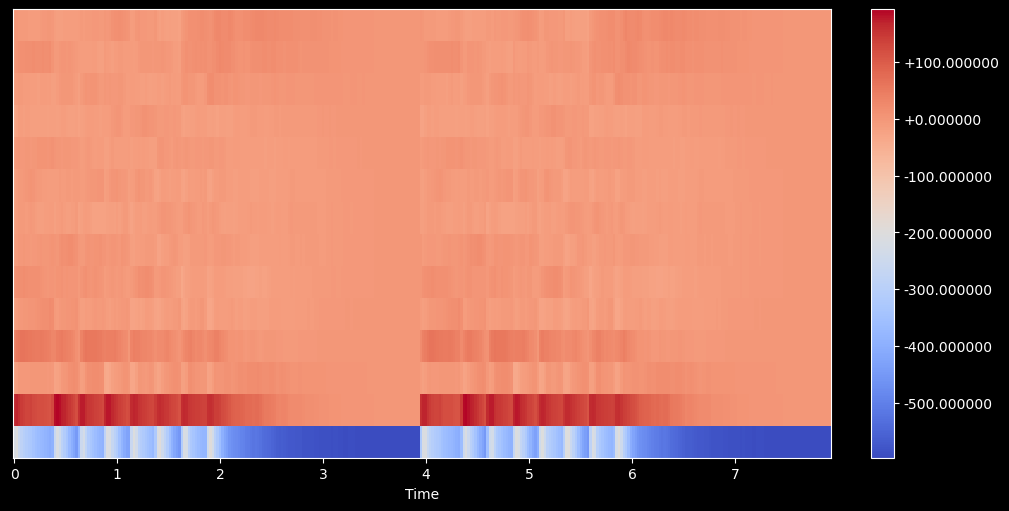

In [12]:
N_MFCC = 14
plt.figure(figsize=(10,5), layout="constrained")
plt.style.use('dark_background')
MFCC_SCALE = librosa.feature.mfcc(y=scale_audio, sr=sr, n_mfcc=N_MFCC)
librosa.display.specshow(MFCC_SCALE, sr=sr, x_axis='time')
plt.colorbar(format='%+2f')

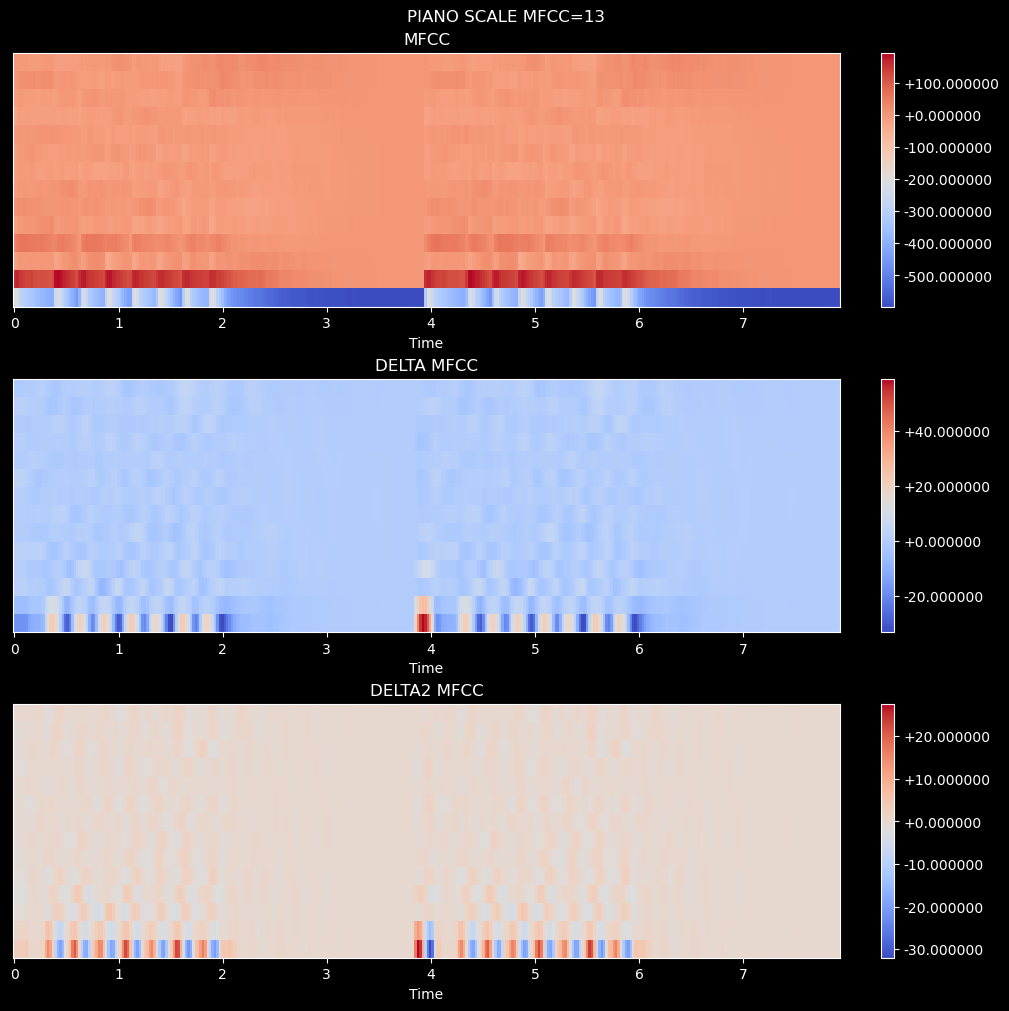

In [13]:
N_MFCC = 14
fig, ax = plt.subplots(3,1,figsize=(10,10), layout="constrained")
plt.suptitle('PIANO SCALE MFCC=13')
plt.style.use('dark_background')
MFCC_SCALE = librosa.feature.mfcc(y=scale_audio, sr=sr, n_mfcc=N_MFCC)
im0 = librosa.display.specshow(MFCC_SCALE, sr=sr, x_axis='time', ax=ax[0])
plt.colorbar(im0, format='%+2f')

ax[0].set_title('MFCC')

DELTA_MFCC = librosa.feature.delta(MFCC_SCALE)
im1 = librosa.display.specshow(DELTA_MFCC, sr=sr, x_axis='time', ax=ax[1])
ax[1].set_title('DELTA MFCC')
plt.colorbar(im1, format='%+2f')

DELTA2_MFCC = librosa.feature.delta(MFCC_SCALE, order=2)
im2 = librosa.display.specshow(DELTA2_MFCC, sr=sr, x_axis='time', ax=ax[2])
ax[2].set_title('DELTA2 MFCC')
plt.colorbar(im2, format='%+2f')


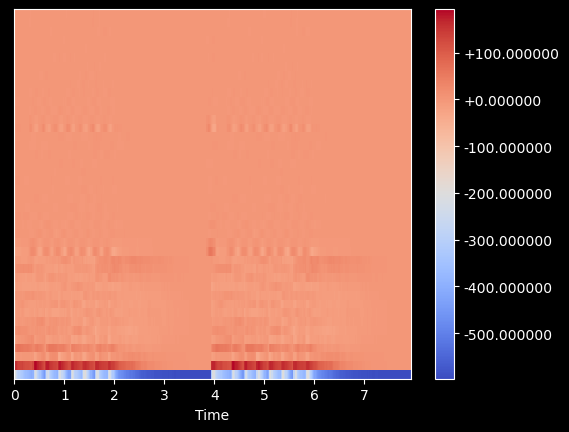

In [14]:
COMPRENSIVE_MFCC = np.concatenate([MFCC_SCALE, DELTA_MFCC, DELTA2_MFCC])
librosa.display.specshow(COMPRENSIVE_MFCC, sr=sr, x_axis='time')
plt.colorbar(format='%+2f')

## Frequency-domain features

In [16]:
audio_debussy, sr = librosa.load('audios/8- Implementing the amplitude envelope_audio_debussy.wav')
audio_rhcp, _ = librosa.load('audios/8- Implementing the amplitude envelope_audio_redhot.wav')

FRAME_SIZE = 2048
HOP_SIZE = 512

SPEC_DEBUSSY = librosa.stft(y=audio_debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
SPEC_RHCP = librosa.stft(y=audio_rhcp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [17]:
SPEC_DEBUSSY.shape

(1025, 1292)

In [18]:
SPEC_RHCP.shape

(1025, 1292)

In [33]:
def find_split_freq_bin(spec, split_freq, sr):
    '''
    THIS FUNCTIONS MAPS A SPECIFIQUE GIVEN FREQUENCY 
    TO THE RESPECTIVE FREQUENCY BIN INSIDE THE SPECTOGRAM
    '''
    freq_range = sr/2
    delta_freq_bin = freq_range/spec.shape[0]
    split_freq_bin = int(np.floor(split_freq/delta_freq_bin))
    return split_freq_bin

def band_energy_ratio(spec, split_freq, sr):
    
    split_freq_bin = find_split_freq_bin(spec, split_freq, sr)
    
    # get power/magnitude spec
    power_spec = np.abs(spec)**2
    power_spec = power_spec.T
    band_energy_ratio = []
    for freq_in_frame in power_spec:
        low_freq = np.sum(freq_in_frame[:split_freq_bin])
        high_freq = np.sum(freq_in_frame[split_freq_bin:])
        band_energy_ratio.append(low_freq/high_freq)
    return np.array(band_energy_ratio)
        


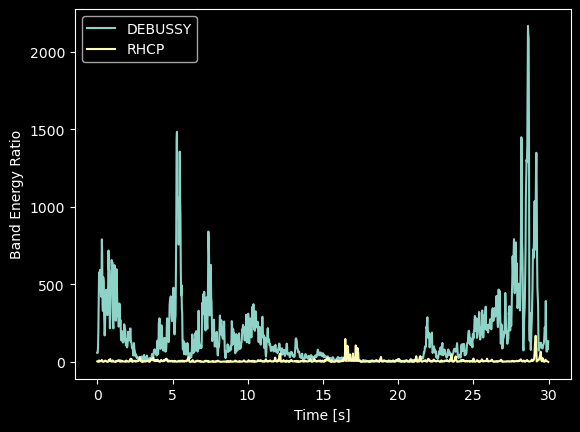

In [35]:
BER_DEBUSSY = band_energy_ratio(SPEC_DEBUSSY, 2000, sr)
BER_RHCP = band_energy_ratio(SPEC_RHCP, 2000, sr)
frames = range(len(BER_DEBUSSY))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)
plt.figure()
plt.plot(t, BER_DEBUSSY)
plt.plot(t, BER_RHCP)
plt.xlabel('Time [s]')
plt.ylabel('Band Energy Ratio')
plt.legend(['DEBUSSY', 'RHCP'])



In [37]:
SC_DEBUSSY = librosa.feature.spectral_centroid(y=audio_debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
SC_RHCP = librosa.feature.spectral_centroid(y=audio_rhcp, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

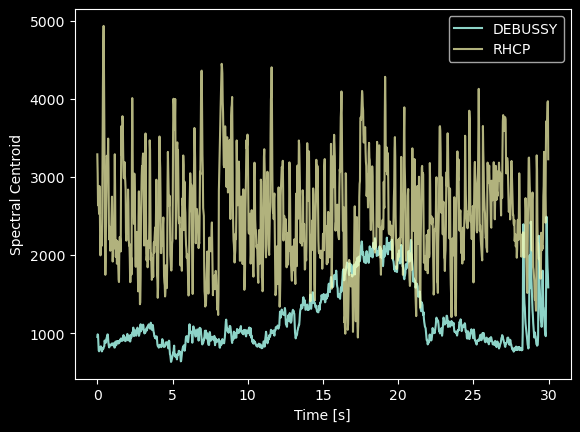

In [41]:
frames = range(len(SC_DEBUSSY))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)
plt.figure()
plt.plot(t, SC_DEBUSSY)
plt.plot(t, SC_RHCP, alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Spectral Centroid')
plt.legend(['DEBUSSY', 'RHCP'])

In [42]:
BW_DEBUSSY = librosa.feature.spectral_bandwidth(y=audio_debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]
BW_RHCP = librosa.feature.spectral_bandwidth(y=audio_rhcp, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)[0]

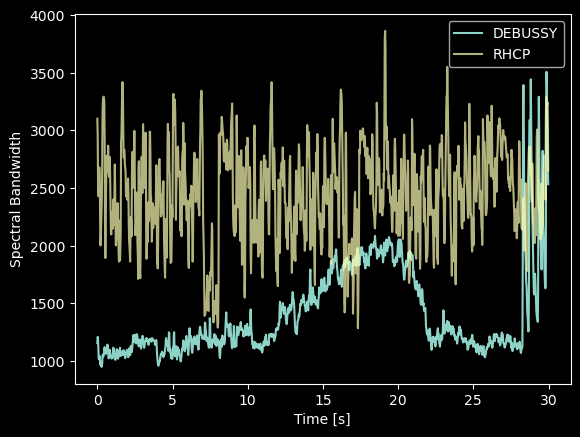

In [44]:
frames = range(len(BW_DEBUSSY))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)
plt.figure()
plt.plot(t, BW_DEBUSSY)
plt.plot(t, BW_RHCP, alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Spectral Bandwidth')
plt.legend(['DEBUSSY', 'RHCP'])